In [1]:
# graphs
import networkx as nx
# math
from math import log
# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-dark')
# timing
from time import perf_counter

### Maximum Independent Set in Random Graphs

plan: create a random graph, 

add an obvius biggest independent set.

Than test the result of networkx 'es approximition algorithm 's solution

In [2]:
# Part of the code for the following function code is from:
# https://github.com/sepinouda/Intro_to_Data_Science/blob/main/Lecture%204/Network%20Analysis/NetworkX.ipynb

def DrawRandomGraphAndIndSet(G: nx.Graph, ind: set):

    # position is stored as node attribute data for random_geometric_graph
    pos = nx.get_node_attributes(G, 'pos')

    # find node near center (0.5,0.5)
    dmin = 1
    ncenter = 0
    for n in pos:
        x, y = pos[n]
        d = (x - 0.5)**2 + (y - 0.5)**2
        if d < dmin:
            ncenter = n
            dmin = d

    # color by path length from node near center
    p = dict(nx.single_source_shortest_path_length(G, ncenter))
    # clor clique differently
    for node in p: 
        if node in ind: p[node] = -1

    plt.figure(figsize = (8, 8))
    nx.draw_networkx_edges(G, pos, nodelist = [ncenter], alpha = 0.4)
    nx.draw_networkx_nodes(G, pos, nodelist = list(p.keys()),
                           node_size = 80,
                           node_color = list(p.values()),
                           cmap = plt.cm.Reds_r)

    plt.title(f'''This graph has: {G.number_of_nodes()} nodes and {G.number_of_edges()} edges
    The size of the max ind-set found in it
    with the approximation algorithm is {len(ind)}''')

    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.axis('off')
    plt.show()

In [3]:
def experiment_instance(n: int, p: float, draw: bool = False):

    if n < 0 or p > 1 or p < 0: raise ValueError('n is for nodes and p is for probability')

    G : nx.Graph = nx.random_geometric_graph(n, p)

    # adding an independent set half the size of the graph
    G.add_nodes_from(range(n +1, int(n * 1.5)))

    ind = G.subgraph(nx.algorithms.approximation.maximum_independent_set(G))

    if draw: DrawRandomGraphAndIndSet(G, ind)

    return len(ind)

The approximation Algorithm of the library's algo

colors the graph with at most O(n / (log n)^2) colors.

Than it picks the largest of the color groups.

So, we can expect a O(1 / (log n)^2) approximation.


let's view a few examples first

the dark nodes are the independant set

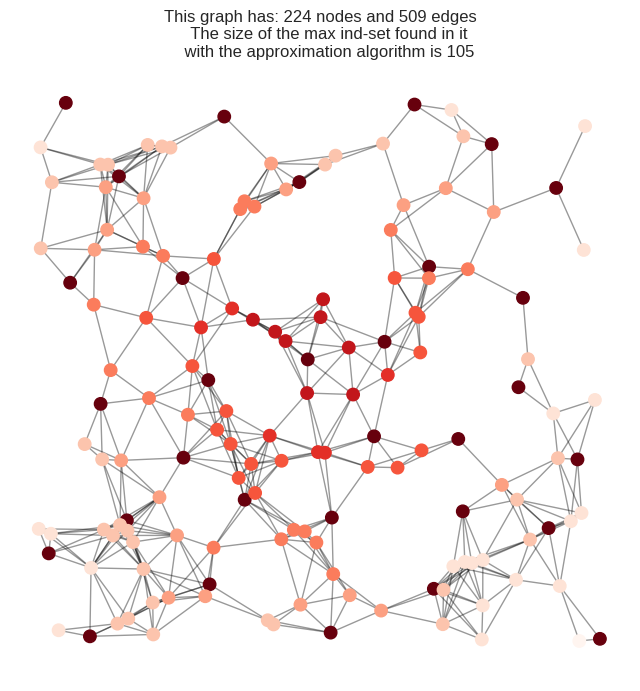

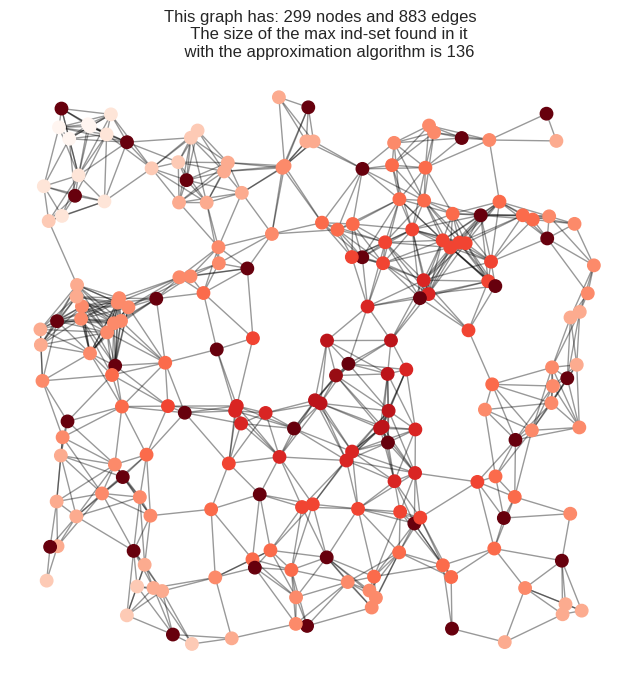

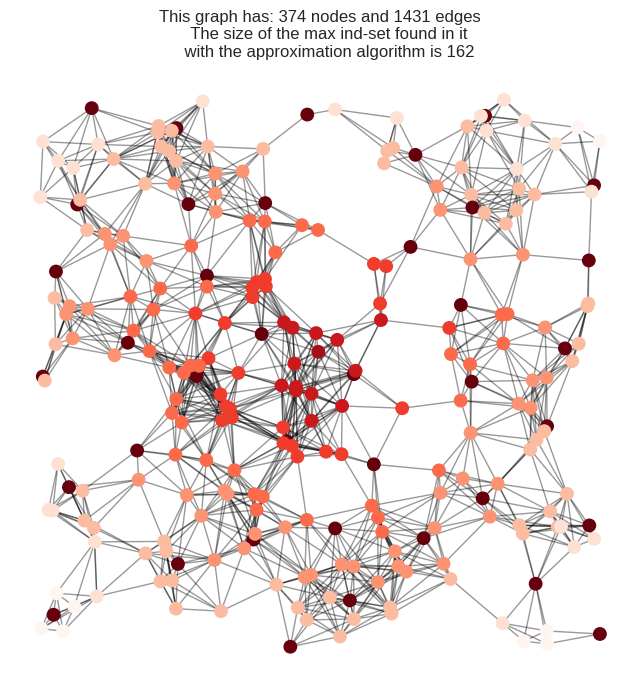

162

In [4]:
experiment_instance(n = 150, p = 0.125, draw = True)
experiment_instance(n = 200, p = 0.125, draw = True)
experiment_instance(n = 250, p = 0.125, draw = True)

##### A more serious experiment

In [5]:
gerentees = []
results = []
sizes = []
times = []

for size in range(1,28):

    n = size * 10

    start = perf_counter()

    results.append(experiment_instance(n, 0.125))
    times.append(perf_counter() - start)
    gerentees.append((n * 0.5) / (log(n) ** 2))
    sizes.append(n)

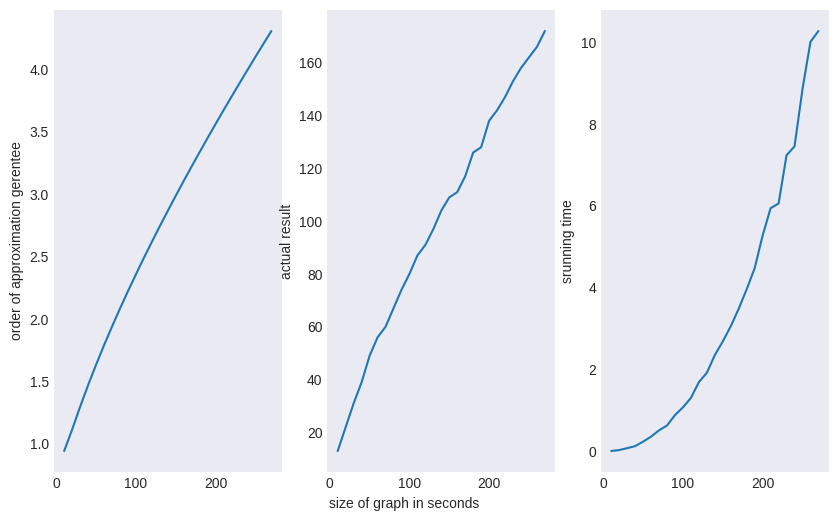

In [6]:
fig, axes = plt.subplots(1, 3, sharex = True, figsize = (10, 6))

axes[0].set_ylabel('order of approximation gerentee')
axes[1].set_ylabel('actual result')
axes[2].set_ylabel('srunning time')
fig.text(0.4, 0.05, 'size of graph in seconds')

axes[0].plot(sizes, gerentees)
axes[1].plot(sizes, results)
axes[2].plot(sizes, times)
plt.show()

In [7]:
results = []
times = []
probabilities = []

for p in range(1, 15):

    p *= 0.05

    start = perf_counter()

    results.append(experiment_instance(100, p))
    times.append(perf_counter() - start)
    probabilities.append(p)

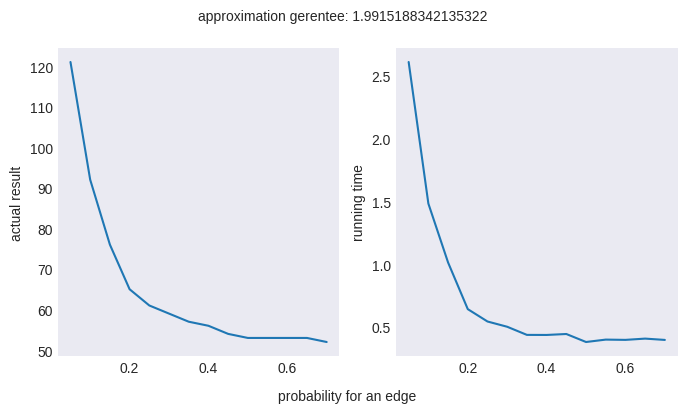

In [8]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize = (8, 4))

axes[0].set_ylabel('actual result')
axes[1].set_ylabel('running time')
fig.text(0.3, 0.95, f'approximation gerentee: {50 / (log(150) ** 2)}')
fig.text(0.4, 0, 'probability for an edge')


axes[0].plot(probabilities, results)
axes[1].plot(probabilities, times)
plt.show()